<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220321_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# KNN - 분류 -forge 데이터셋 분류

In [ ]:
pip install mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

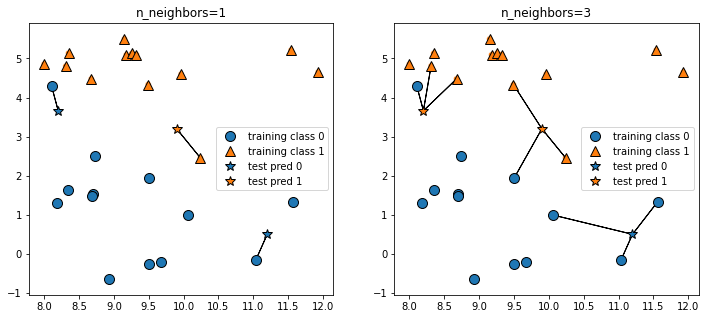

In [17]:
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns

# 데이터셋 초기화
X, y = mglearn.datasets.make_forge()
# 산점도
# sns.scatterplot(X[:, 0], X[:, 1], hue=y)

# KNN 알고리즘 적용
fig = plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title("n_neighbors=1")
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
mglearn.plots.plot_knn_classification(n_neighbors=1)

plt.subplot(1,2,2)
plt.title("n_neighbors=3")
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
mglearn.plots.plot_knn_classification(n_neighbors=3)

plt.show()

### 분류 모델의 성능 예측

In [29]:
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋 초기화
X, y = mglearn.datasets.make_forge()
# 데이터셋 나누기(훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# KNN 알고리즘 적용
from sklearn.neighbors import KNeighborsClassifier
# KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors=3)
# KNN 모델 학습
clf = knn.fit(X_train, y_train) # clf변수 생성 해도되고 안해도 되네

print("예측 :", clf.predict(X_test)) # clf.predict(), knn.predict() 둘다 가능하네
# [1 0 1 0 1 0 0]
print("실제 :", y_test)
# [1 0 1 0 1 1 0]

# 직접 비교를 통한 정확도
predict = clf.predict(X_test)
print(round((predict == y_test).mean(), 2))
# score()함수를 통한 정확도
print(round(clf.score(X_test, y_test), 2))

예측 : [1 0 1 0 1 0 0]
실제 : [1 0 1 0 1 1 0]
0.86
0.86


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


### KNN - 분류 - 알고리즘 분석하기
 - 이웃의 개수에 따른 모델의 결정경계 확인

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x,

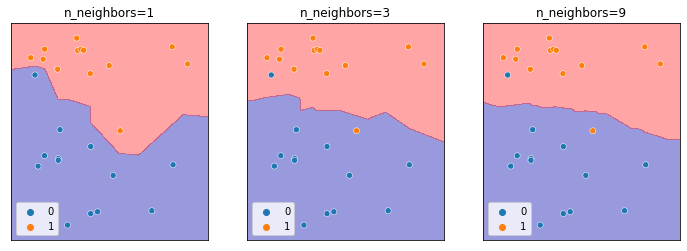

In [34]:
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋 초기화
X, y = mglearn.datasets.make_forge()

fig = plt.figure(figsize=(12, 4))

for idx, n in enumerate([1, 3, 9]):
  plt.subplot(1,3,idx+1)
  clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=0.4)
  sns.scatterplot(X[:, 0], X[:, 1], y)
  plt.title("n_neighbors={}".format(n))
  plt.xlabel("attr 0")
  plt.ylabel("attr 1")

이웃의 수가 커질수록 경계선은 점점 더 완곡해짐

# KNN - 회귀 - wave 데이터셋 회귀